In [1]:
import pandas as pd
import os
import ModelEvaluation

In [2]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
grandparent_dir = os.path.dirname(parent_dir)

In [3]:
#Load in the dataframe containing all model predictions on the FEMH test set
prediction_df = pd.read_csv(f'{grandparent_dir}/Predict Audio/FEMH_ModelPredictions.csv', index_col=0)
print(prediction_df.shape)
prediction_df.head()

(660, 74)


,file,ground truth,LR_FeatureStates_Age_Sex prediction,LR_FeatureStates_Age_Sex probability,LR_FeatureStates_Age_Sex_Symptoms prediction,LR_FeatureStates_Age_Sex_Symptoms probability,LR_FeatureStates_Rec_Only prediction,LR_FeatureStates_Rec_Only probability,LR_FeatureStates_Symptoms prediction,LR_FeatureStates_Symptoms probability,...,SVM_MFCC_Symptoms prediction,SVM_MFCC_Symptoms probability,SVM_OpenSmile_Age_Sex prediction,SVM_OpenSmile_Age_Sex probability,SVM_OpenSmile_Age_Sex_Symptoms prediction,SVM_OpenSmile_Age_Sex_Symptoms probability,SVM_OpenSmile_Rec_Only prediction,SVM_OpenSmile_Rec_Only probability,SVM_OpenSmile_Symptoms prediction,SVM_OpenSmile_Symptoms probability
0,Atrophy-0001apo,Benign,Benign,0.001301,Benign,0.157229,Benign,0.000026,Benign,0.221742,...,Benign,0.008403,Benign,0.010395,Benign,0.017766,Benign,0.019887,Benign,0.025877
1,Atrophy-0400og6,Benign,Benign,0.002063,Benign,0.213735,Benign,0.000276,Benign,0.451704,...,Malignant,0.055249,Benign,0.008386,Benign,0.015901,Benign,0.014908,Benign,0.026531
2,Atrophy-0500cg6,Benign,Benign,0.070688,Malignant,0.711418,Benign,0.044419,Malignant,0.573204,...,Malignant,0.131172,Malignant,0.123806,Malignant,0.083921,Malignant,0.047273,Malignant,0.079512
3,Atrophy-0601ntf,Benign,Malignant,0.961759,Malignant,0.625363,Malignant,0.926107,Malignant,0.625380,...,Benign,0.022580,Benign,0.035384,Benign,0.018849,Benign,0.024361,Benign,0.039769
4,Atrophy-07017ip,Benign,Benign,0.000648,Benign,0.124255,Benign,0.000029,Benign,0.321406,...,Benign,0.014545,Benign,0.011126,Malignant,0.042882,Benign,0.025011,Malignant,0.060018


In [4]:
model = 'LR_FeatureStates_Age_Sex_Symptoms'

y_test=prediction_df['ground truth']
y_pred=prediction_df[f'{model} prediction']
y_pred_prob = prediction_df[f'{model} probability']

Results for Logistic Regression FeatureStates Voice+Demographics+Symptoms:
Balanced Accuracy: 0.798 (0.711, 0.871)
Sensitivity: 0.800 (0.633, 0.947)
Specificity: 0.797 (0.765, 0.826)
AUROC: 0.896 (0.844, 0.941)



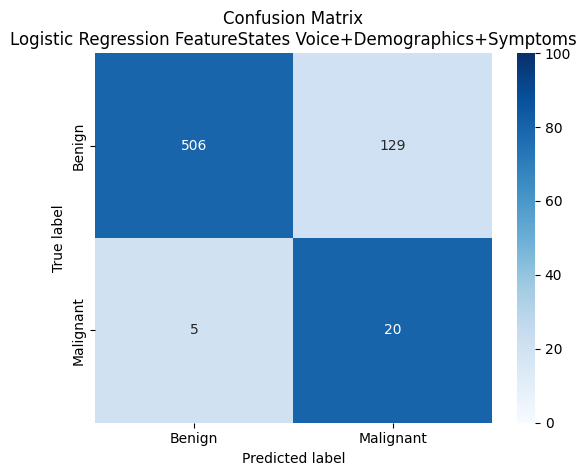

In [5]:
ModelEvaluation.evaluation_report(y_test, y_pred, y_pred_prob=y_pred_prob, model_name='Logistic Regression FeatureStates Voice+Demographics+Symptoms', report_save_file='test.txt', confusion_matrix_save_file='test.pdf')